# Оценка стоимости недвижимости с помощью нейронной сети


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:



ValueError: ignored

In [ ]:
#!ls "/content/drive/My Drive/"

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
rm -Rf /content/test_directory*

In [ ]:
!ls /content

sample_data  train.csv


Загрузка данных с Google Drive

In [ ]:
import pandas as pd
data = pd.read_csv("/content/train.csv")

Отображение загруженных данных

# Новый раздел

In [ ]:
data

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696100,62041,13,1.0,-8.0,-11.0,-2.0,6.5,8.5,-1.0,8.5,14.0,0.931667,0.488333,0.801667,0.948333,-3.8125,-3.5000,-0.1875,4.0000,NaN,NaN,NaN,NaN,1.524001
696101,62041,18,1.0,-4.5,-10.5,-4.5,13.0,0.0,-1.5,6.5,16.0,0.628333,0.468333,0.798333,0.971667,7.9375,-1.5625,2.0625,7.9375,NaN,NaN,NaN,NaN,1.524001
696102,62041,23,1.0,-2.5,-9.0,-3.0,5.0,1.5,-4.0,4.5,14.0,0.655000,0.488333,0.721667,0.935000,0.3750,-2.4375,2.6250,6.8750,NaN,NaN,NaN,NaN,1.524001
696103,62041,28,1.0,-3.0,-3.5,1.0,8.0,-3.0,-1.0,3.5,17.0,0.795000,0.478333,0.805000,0.911667,6.6250,-1.0000,3.3750,7.9375,NaN,NaN,NaN,NaN,1.524001


In [ ]:
data=data.fillna(data.mean())
features = data.drop(columns=['Expected'])

In [ ]:
features

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,1,3,10.0,22.550284,19.608468,22.241543,25.440299,24.329956,21.822248,24.059708,26.935227,0.973529,0.920881,0.975096,1.014955,0.534467,-0.691924,0.343449,2.039189,0.048621,-3.378408,-0.443333,3.983335
1,1,16,10.0,22.550284,19.608468,22.241543,25.440299,24.329956,21.822248,24.059708,26.935227,0.973529,0.920881,0.975096,1.014955,0.534467,-0.691924,0.343449,2.039189,0.048621,-3.378408,-0.443333,3.983335
2,1,25,10.0,22.550284,19.608468,22.241543,25.440299,24.329956,21.822248,24.059708,26.935227,0.973529,0.920881,0.975096,1.014955,0.534467,-0.691924,0.343449,2.039189,0.048621,-3.378408,-0.443333,3.983335
3,1,35,10.0,22.550284,19.608468,22.241543,25.440299,24.329956,21.822248,24.059708,26.935227,0.973529,0.920881,0.975096,1.014955,0.534467,-0.691924,0.343449,2.039189,0.048621,-3.378408,-0.443333,3.983335
4,1,45,10.0,22.550284,19.608468,22.241543,25.440299,24.329956,21.822248,24.059708,26.935227,0.973529,0.920881,0.975096,1.014955,0.534467,-0.691924,0.343449,2.039189,0.048621,-3.378408,-0.443333,3.983335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696100,62041,13,1.0,-8.000000,-11.000000,-2.000000,6.500000,8.500000,-1.000000,8.500000,14.000000,0.931667,0.488333,0.801667,0.948333,-3.812500,-3.500000,-0.187500,4.000000,0.048621,-3.378408,-0.443333,3.983335
696101,62041,18,1.0,-4.500000,-10.500000,-4.500000,13.000000,0.000000,-1.500000,6.500000,16.000000,0.628333,0.468333,0.798333,0.971667,7.937500,-1.562500,2.062500,7.937500,0.048621,-3.378408,-0.443333,3.983335
696102,62041,23,1.0,-2.500000,-9.000000,-3.000000,5.000000,1.500000,-4.000000,4.500000,14.000000,0.655000,0.488333,0.721667,0.935000,0.375000,-2.437500,2.625000,6.875000,0.048621,-3.378408,-0.443333,3.983335
696103,62041,28,1.0,-3.000000,-3.500000,1.000000,8.000000,-3.000000,-1.000000,3.500000,17.000000,0.795000,0.478333,0.805000,0.911667,6.625000,-1.000000,3.375000,7.937500,0.048621,-3.378408,-0.443333,3.983335


Нормировка данных так, чтобы среднее = 0, стандартное отклонение = 1

In [ ]:
# Среднее значение
mymean = features.mean(axis=0)
# Стандартное отклонение
mystd = features.std(axis=0)
features -= mymean
features /= mystd

In [ ]:
features

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,-1.741100,-1.527544,-0.250117,1.531146e-11,2.775523e-11,1.969248e-11,-7.740269e-12,-1.698891e-12,-3.344496e-11,-1.970852e-11,2.887289e-12,-1.038336e-10,1.547801e-10,6.983989e-11,2.799045e-11,-4.342223e-12,-1.501218e-11,-3.141901e-12,-1.215767e-11,-5.459672e-14,4.150877e-12,4.485419e-13,-1.292692e-11
1,-1.741100,-0.778550,-0.250117,1.531146e-11,2.775523e-11,1.969248e-11,-7.740269e-12,-1.698891e-12,-3.344496e-11,-1.970852e-11,2.887289e-12,-1.038336e-10,1.547801e-10,6.983989e-11,2.799045e-11,-4.342223e-12,-1.501218e-11,-3.141901e-12,-1.215767e-11,-5.459672e-14,4.150877e-12,4.485419e-13,-1.292692e-11
2,-1.741100,-0.260016,-0.250117,1.531146e-11,2.775523e-11,1.969248e-11,-7.740269e-12,-1.698891e-12,-3.344496e-11,-1.970852e-11,2.887289e-12,-1.038336e-10,1.547801e-10,6.983989e-11,2.799045e-11,-4.342223e-12,-1.501218e-11,-3.141901e-12,-1.215767e-11,-5.459672e-14,4.150877e-12,4.485419e-13,-1.292692e-11
3,-1.741100,0.316133,-0.250117,1.531146e-11,2.775523e-11,1.969248e-11,-7.740269e-12,-1.698891e-12,-3.344496e-11,-1.970852e-11,2.887289e-12,-1.038336e-10,1.547801e-10,6.983989e-11,2.799045e-11,-4.342223e-12,-1.501218e-11,-3.141901e-12,-1.215767e-11,-5.459672e-14,4.150877e-12,4.485419e-13,-1.292692e-11
4,-1.741100,0.892282,-0.250117,1.531146e-11,2.775523e-11,1.969248e-11,-7.740269e-12,-1.698891e-12,-3.344496e-11,-1.970852e-11,2.887289e-12,-1.038336e-10,1.547801e-10,6.983989e-11,2.799045e-11,-4.342223e-12,-1.501218e-11,-3.141901e-12,-1.215767e-11,-5.459672e-14,4.150877e-12,4.485419e-13,-1.292692e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696100,1.732754,-0.951395,-2.375313,-4.428557e+00,-5.423827e+00,-3.609365e+00,-2.344474e+00,-2.169000e+00,-3.705149e+00,-2.182748e+00,-1.524870e+00,-7.932400e-01,-6.395681e+00,-3.965602e+00,-2.133129e+00,-5.008260e+00,-5.247685e+00,-9.926803e-01,1.848564e+00,-5.459672e-14,4.150877e-12,4.485419e-13,-1.292692e-11
696101,1.732754,-0.663320,-2.375313,-3.921198e+00,-5.335227e+00,-3.981595e+00,-1.539889e+00,-3.333658e+00,-3.786323e+00,-2.463313e+00,-1.289100e+00,-6.541005e+00,-6.691402e+00,-4.041822e+00,-1.386023e+00,8.529237e+00,-1.626918e+00,3.213999e+00,5.560659e+00,-5.459672e-14,4.150877e-12,4.485419e-13,-1.292692e-11
696102,1.732754,-0.375245,-2.375313,-3.631279e+00,-5.069426e+00,-3.758257e+00,-2.530147e+00,-3.128130e+00,-4.192194e+00,-2.743877e+00,-1.524870e+00,-6.035706e+00,-6.395681e+00,-5.794868e+00,-2.560044e+00,-1.837266e-01,-3.262103e+00,4.265668e+00,4.558983e+00,-5.459672e-14,4.150877e-12,4.485419e-13,-1.292692e-11
696103,1.732754,-0.087171,-2.375313,-3.703759e+00,-4.094825e+00,-3.162690e+00,-2.158800e+00,-3.744714e+00,-3.705149e+00,-2.884159e+00,-1.171215e+00,-3.382893e+00,-6.543542e+00,-3.889383e+00,-3.307147e+00,7.017070e+00,-5.757274e-01,5.667895e+00,5.560659e+00,-5.459672e-14,4.150877e-12,4.485419e-13,-1.292692e-11


In [ ]:
y = data.iloc[:, 13]

In [ ]:
y

0         0.975096
1         0.975096
2         0.975096
3         0.975096
4         0.975096
            ...   
696100    0.801667
696101    0.798333
696102    0.721667
696103    0.805000
696104    0.785000
Name: RhoHV_5x5_50th, Length: 696105, dtype: float64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=42)

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 97 kB 3.9 MB/s 


In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


In [ ]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=128, # минимальное количество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  
  return model

In [ ]:
rm -Rf /content/test_directory

In [ ]:
tuner = RandomSearch(
  build_model, # функция создания модели
  objective='val_mae', # метрика, которую нужно оптимизировать   доля правильных ответов на проверочном наборе данных
  max_trials=2, # максимальное количество запусков обучения
  directory='test_directory' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 32, 'sampling': None}


In [ ]:
tuner.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=5, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 2 Complete [00h 02m 22s]
val_mae: 0.0006015177932567894

Best val_mae So Far: 0.0002906520676333457
Total elapsed time: 00h 04m 17s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 608
Score: 0.0002906520676333457
Trial summary
Hyperparameters:
units_input: 576
Score: 0.0006015177932567894


In [ ]:
models = tuner.get_best_models(num_models=3)

In [ ]:
for model in models:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 608)               14592     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 609       
Total params: 15,201
Trainable params: 15,201
Non-trainable params: 0
_________________________________________________________________
7179/7179 [==============================] - 8s 1ms/step - loss: 6.0103e-07 - mae: 2.8664e-04

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 576)               13824     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 577       
Total params: 14,401
Trainable params: 14,401
Non-trainable params: 0

In [ ]:
def build_model2(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=512, # минимальное кол ичество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  return model

In [ ]:
rm -Rf /content/test_directory2

In [ ]:
tuner2 = BayesianOptimization(
  build_model2, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 2, # максимальное количество запусков обучения
  directory ='test_directory2' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner2.search_space_summary()

Search space summary
Default search space size: 2
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}


In [ ]:
tuner2.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=5, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 2 Complete [00h 04m 49s]
val_mae: 0.000834714388474822

Best val_mae So Far: 0.0004861544002778828
Total elapsed time: 00h 08m 12s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.results_summary()

Results summary
Results in test_directory2/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 576
units_hidden: 224
Score: 0.0004861544002778828
Trial summary
Hyperparameters:
units_input: 704
units_hidden: 384
Score: 0.000834714388474822


In [ ]:
models2 = tuner2.get_best_models(num_models=3)

In [ ]:
for model in models2:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 576)               13824     
_________________________________________________________________
dense_1 (Dense)              (None, 224)               129248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 225       
Total params: 143,297
Trainable params: 143,297
Non-trainable params: 0
_________________________________________________________________
7179/7179 [==============================] - 10s 1ms/step - loss: 1.3488e-06 - mae: 4.8403e-04

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 704)               16896     
_________________________________________________________________


In [ ]:
def build_model3(hp):
  model = Sequential()

  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
                               min_value=512, # минимальное количество нейронов - 128
                               max_value=1024, # максимальное количество - 1024
                               step=32), input_shape=(X_train.shape[1],), activation=activation_choice))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  return model

In [ ]:
rm -Rf /content/test_directory3

In [ ]:
tuner3 = BayesianOptimization(
  build_model3, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 2, # максимальное количество запусков обучения
  directory ='test_directory3' # каталог, куда сохраняются обученные сети
)

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        1.4G        9.1G        1.1M        2.2G         11G
Swap:            0B          0B          0B


In [ ]:
tuner3.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [ ]:
tuner3.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=5, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 2 Complete [00h 05m 22s]
val_mae: 0.0015024171443656087

Best val_mae So Far: 0.0004243513394612819
Total elapsed time: 00h 11m 45s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary()

Results summary
Results in test_directory3/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: relu
units_input: 800
units_hidden: 480
optimizer: adam
Score: 0.0004243513394612819
Trial summary
Hyperparameters:
activation: tanh
units_input: 640
units_hidden: 416
optimizer: adam
Score: 0.0015024171443656087


In [ ]:
models3 = tuner3.get_best_models(num_models=3)

In [ ]:
for model in models3:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               19200     
_________________________________________________________________
dense_1 (Dense)              (None, 480)               384480    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 481       
Total params: 404,161
Trainable params: 404,161
Non-trainable params: 0
_________________________________________________________________
7179/7179 [==============================] - 15s 2ms/step - loss: 1.3332e-06 - mae: 4.2429e-04

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               15360     
_________________________________________________________________


In [ ]:
def build_model4(hp):

  model = Sequential()

  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  
  model.add(Dense(units=hp.Int("units_input", min_value=32,
                               max_value=1024,
                               step=32),
                  activation=activation_choice, 
                  input_shape=(X_train.shape[1], )))
  
  model.add(Dropout(0.3))

  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',
                                 min_value=32//(i+1),
                                 max_value=512//(i+1), 
                                 step=64//(i+1)),
                     activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  model.summary()
  return model

In [ ]:
tuner4 = BayesianOptimization(
  build_model4, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 2, # максимальное количество запусков обучения
  directory ='test_directory5' # каталог, куда сохраняются обученные сети
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                768       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner4.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'elu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': None}
hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
layer_0_units_ (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [ ]:
tuner4.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=5, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 2 Complete [00h 02m 56s]
val_mae: 0.0034398697316646576

Best val_mae So Far: 0.0010557268979027867
Total elapsed time: 00h 09m 18s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner4.results_summary()

Results summary
Results in test_directory5/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: relu
units_input: 704
hidden_layers: 3
layer_0_units_: 416
optimizer: adam
layer_1_units_: 16
layer_2_units_: 10
Score: 0.0010557268979027867
Trial summary
Hyperparameters:
activation: elu
units_input: 768
hidden_layers: 1
layer_0_units_: 96
optimizer: SGD
layer_1_units_: 80
layer_2_units_: 73
Score: 0.0034398697316646576


In [ ]:
models4 = tuner4.get_best_models(num_models=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 704)               16896     
_________________________________________________________________
dropout (Dropout)            (None, 704)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               293280    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                6672      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 317,029
Trainable params: 317,029
Non-trainable params: 0
__________________________________________________

In [ ]:
for model in models4:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 704)               16896     
_________________________________________________________________
dropout (Dropout)            (None, 704)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               293280    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                6672      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 317,029
Trainable params: 317,029
Non-trainable params: 0
__________________________________________________

In [ ]:
best_params = tuner4.get_best_hyperparameters()[0]
best_model = tuner4.hypermodel.build(best_params)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 704)               16896     
_________________________________________________________________
dropout (Dropout)            (None, 704)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               293280    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                6672      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 317,029
Trainable params: 317,029
Non-trainable params: 0
__________________________________________________

In [ ]:
best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
11660/11660 [==============================] - 79s 7ms/step - loss: 0.0015 - mae: 0.0117 - val_loss: 1.4361e-05 - val_mae: 0.0020
Epoch 2/10
11660/11660 [==============================] - 92s 8ms/step - loss: 3.2359e-05 - mae: 0.0025 - val_loss: 1.2222e-05 - val_mae: 0.0011
Epoch 3/10
11660/11660 [==============================] - 104s 9ms/step - loss: 2.2635e-05 - mae: 0.0021 - val_loss: 1.8040e-05 - val_mae: 0.0038
Epoch 4/10
11660/11660 [==============================] - 91s 8ms/step - loss: 1.9177e-05 - mae: 0.0019 - val_loss: 1.0772e-05 - val_mae: 0.0024
Epoch 5/10
11660/11660 [==============================] - 88s 8ms/step - loss: 1.5286e-05 - mae: 0.0017 - val_loss: 4.6798e-06 - val_mae: 0.0014
Epoch 6/10
11660/11660 [==============================] - 100s 9ms/step - loss: 1.5098e-05 - mae: 0.0017 - val_loss: 3.6466e-05 - val_mae: 0.0054
Epoch 7/10
11660/11660 [==============================] - 104s 9ms/step - loss: 1.4587e-05 - mae: 0.0017 - val_loss: 7.0052e-06 - va

In [ ]:
#Корреляция новой модели 
predicted_y_tuner = best_model.predict(X_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.5695535587104426


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


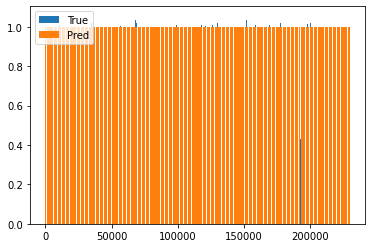

In [ ]:
from matplotlib import pyplot as plt
y_test = y_test.reset_index(drop=True)

x = np.arange(0, len(y_test))

plt.bar(x, y_test, label = 'True')
plt.bar(x, predicted_y_tuner, label = 'Pred')
plt.legend()

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/10
11660/11660 [==============================] - 53s 4ms/step - loss: 9.0465e-05 - mae: 0.0048 - val_loss: 5.4428e-05 - val_mae: 0.0038
Epoch 2/10
11660/11660 [==============================] - 51s 4ms/step - loss: 6.0325e-05 - mae: 0.0039 - val_loss: 4.2613e-06 - val_mae: 0.0013
Epoch 3/10
11660/11660 [==============================] - 52s 4ms/step - loss: 5.6239e-05 - mae: 0.0038 - val_loss: 2.1633e-05 - val_mae: 0.0026
Epoch 4/10
11660/11660 [==============================] - 51s 4ms/step - loss: 6.0755e-05 - mae: 0.0040 - val_loss: 2.1288e-04 - val_mae: 0.0090
Epoch 5/10
11660/11660 [==============================] - 53s 5ms/step - loss: 5.5797e-05 - mae: 0.0038 - val_loss: 3.0492e-05 - val_mae: 0.0028
Epoch 6/10
11660/11660 [==============================] - 52s 4ms/step - loss: 6.6684e-05 - mae: 0.0039 - val_loss: 1.2566e-05 - val_mae: 0.0021
Epoch 7/10
11660/11660 [==============================] - 50s 4ms/step - loss: 6.5001e-05 - mae: 0.0040 - val_loss: 2.0494e-05 - v

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               18432     
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                73824     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 97        
Total params: 92,353
Trainable params: 92,353
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
 pred=model.predict(X_test)

In [ ]:
y_test=y_test.reset_index(drop=True)

In [ ]:
print("Предсказание стоимости",pred[1][0],", правильная стоимость",y_test[1])

Предсказание стоимости 1.0005658 , правильная стоимость 0.99833333


In [ ]:
 vec=np.array([])
 for i in np.arange(0,len(pred)):
   vec=np.append(vec,pred[i][0])

In [ ]:
 vec=np.array([])
 for i in np.arange(0,len(pred)):
   vec=np.append(vec,pred[i][0])

In [ ]:
diff=np.array([])
for i in np.arange(0,len(y_test)):
  diff=np.append(diff,np.abs(pred[i][0]-y_test[i]))

In [ ]:
for i in np.arange(0,len(y_test)):
  print("Предсказание стоимости",pred[i][0],", правильная стоимость",y_test[i],"разница",np.abs(pred[i][0]-y_test[i]))

Выходные данные были обрезаны до нескольких последних строк (5000).
Предсказание стоимости 0.98109996 , правильная стоимость 0.9816666999999999 разница 0.0005667368118285054
Предсказание стоимости 0.9748409 , правильная стоимость 0.9750958915515284 разница 0.00025501211122080925
Предсказание стоимости 0.9857697 , правильная стоимость 0.98833334 разница 0.002563650916900584
Предсказание стоимости 0.9741772 , правильная стоимость 0.9750958915515284 разница 0.0009187098307947839
Предсказание стоимости 0.9781166 , правильная стоимость 0.9750958915515284 разница 0.0030206803517003333
Предсказание стоимости 0.9739134 , правильная стоимость 0.9750958915515284 разница 0.0011825199885706628
Предсказание стоимости 0.9737909 , правильная стоимость 0.9750958915515284 разница 0.0013050075335840905
Предсказание стоимости 0.75382954 , правильная стоимость 0.7583333000000001 разница 0.004503761177826027
Предсказание стоимости 0.97438043 , правильная стоимость 0.9750958915515284 разница 0.0007154579921

In [ ]:
CC_tuner=np.corrcoef(vec,y_test)
CC_tuner=CC_tuner[0][1]
print(CC_tuner);

0.9986881133891022
